In [1]:
import sys
sys.path.append('../wamuu')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
from time import time

from instance import Instance
from solution import Solution
from sweep import best_sweep
from metaheuristics.tabu_search import ts_node_from, ts_node_to, ts_arc

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

First we choose an instance to work on

In [2]:
I = Instance(
    instance_dir='../data/raw',
    instance='n50_s01_t01_w01'
)

In [3]:
G = nx.Graph()
for i in range(I.n+1): G.add_node(i, pos=I.nodes[i])
pos = nx.get_node_attributes(G, 'pos')

In [4]:
def plot(sol=None):
    nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color='#FFA726', node_size=80, node_shape='s')
    nx.draw_networkx_nodes(G, pos, nodelist=range(1, I.n+1), node_color='#BDBDBD', node_size=80)
    if sol != None:
        nx.draw_networkx_edges(G, pos,
                           edgelist=[[i, sol.node_up[i]] for i in range(1, I.n+1)],
                           edge_color=['#3E2723' if sol.node_power[i] <= I.max_cable_capacity else '#D50000' for i in range(1, I.n+1)],
                           width=[I.get_cable_index_from_node_power(sol.node_power[i])+1 for i in range(1, I.n+1)])
    nx.draw_networkx_labels(G, pos, font_size=8)

def plot_small(sol=None):
    nx.draw_networkx_nodes(G, pos, nodelist=[0], node_color='#FFA726', node_size=10, node_shape='s')
    nx.draw_networkx_nodes(G, pos, nodelist=range(1, I.n+1), node_color='#212121', node_size=5)
    if sol != None:
        nx.draw_networkx_edges(G, pos,
                           edgelist=[[i, sol.node_up[i]] for i in range(1, I.n+1)],
                           edge_color=['#3E2723' if sol.node_power[i] <= I.max_cable_capacity else '#D50000' for i in range(1, I.n+1)])

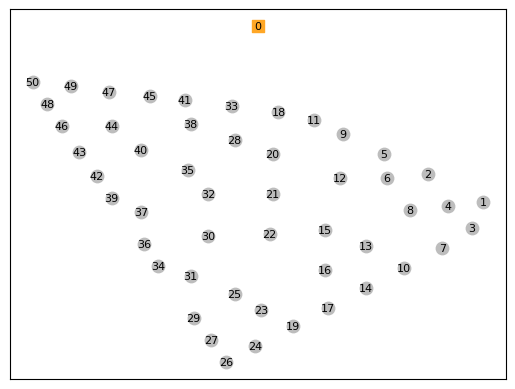

In [5]:
plot()

Let's see the best sweep with its cost

In [6]:
S0 = Solution(I, best_sweep(I))

Best sweep cost: 36176222


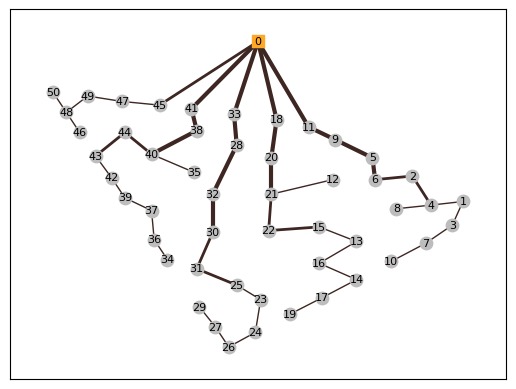

In [7]:
print(f'Best sweep cost: {S0.cost}')
plot(S0)

Let's run the three Tabu Search options

In [8]:
TS_node_from = ts_node_from(I, tl=10*60, seed=1)

In [9]:
TS_node_to = ts_node_to(I, tl=10*60, seed=2)

In [10]:
TS_arc = ts_arc(I, tl=10*60, seed=3)

In [11]:
print(f'Best sweep cost: {S0.cost}')
print(f'TS_node_from cost: {TS_node_from.cost} // improvement: {1-TS_node_from.cost/S0.cost:.2%}')
print(f'TS_node_to cost: {TS_node_to.cost} // improvement: {1-TS_node_to.cost/S0.cost:.2%}')
print(f'TS_arc cost: {TS_arc.cost} // improvement: {1-TS_arc.cost/S0.cost:.2%}')

Best sweep cost: 36176222
TS_node_from cost: 35722666 // improvement: 1.25%
TS_node_to cost: 35565697 // improvement: 1.69%
TS_arc cost: 35722666 // improvement: 1.25%


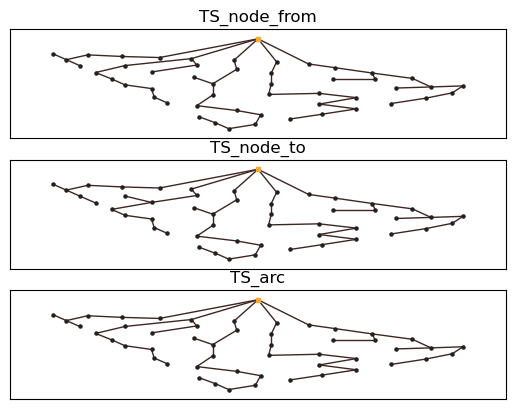

In [12]:
fig, axs = plt.subplots(3)

plt.sca(axs[0])
plt.title('TS_node_from')
plot_small(TS_node_from)

plt.sca(axs[1])
plt.title('TS_node_to')
plot_small(TS_node_to)

plt.sca(axs[2])
plt.title('TS_arc')
plot_small(TS_arc)

plt.show()